# UCI Credit Card Default Dataset

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Let us first check for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Fortunately this dataset does not contain null values

In [4]:
# Now let us study the dataset a little bit
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Let us now describe the dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


As per the above Dataset we can see most people in this dataset are female since the mean of sex is close to 2 which corresponds to female.
Average Limit Balance is 167484.322667 dollars with a standard deviation of 129747.661567 dollars. We shall find out the distribution later on.
Most individuals in the dataset are either single or other category since the mean is more than 1.5 also. 



# EDA Time

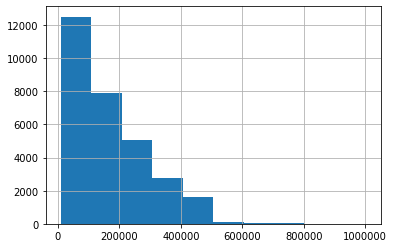

In [6]:
# Limit Balance histogram
df['LIMIT_BAL'].hist()

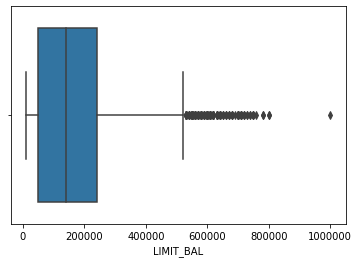

In [7]:
# Boxplot of Income 
sns.boxplot(x='LIMIT_BAL', data=df)

We can see most people have Limit Balance skewed to the right. with some outliers which we shall remove.

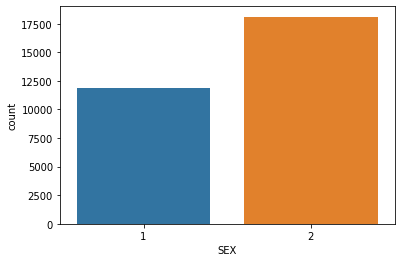

In [8]:
# Countplot of gender
sns.countplot(x='SEX', data=df)

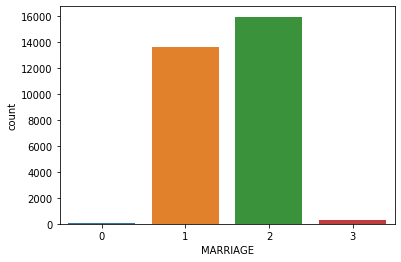

In [9]:
# Marital Status-wise countplot
sns.countplot(x='MARRIAGE', data=df)

In [10]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
# Since our dataset legend does not have any values in the legend for marriage in 0 category. So let us club values with 0 into others i.e 3.
df.loc[df['MARRIAGE']==0,'MARRIAGE']=3

In [12]:
# lET US CHECK IF OUR TRANSFORMATION WORKED
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

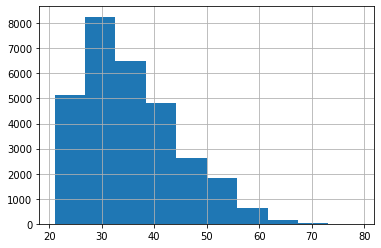

In [13]:
# Let us see the distribution of Age
df['AGE'].hist()

Thus we can see most people in the dataset are under 45 with some outliers above 62 or so. We shall handle them too while handling outliers before preparing our model.

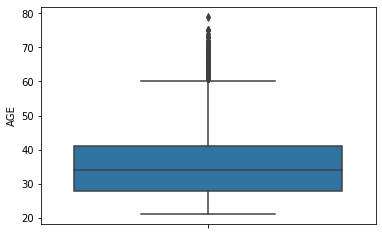

In [14]:
# Boxplot of Age column
sns.boxplot(y='AGE', data=df)

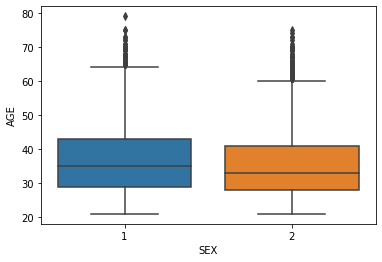

In [15]:
# Let us see the age distribution with respect to sex
sns.boxplot(x='SEX',y='AGE', data=df)

In the above example we can clearly see the distribution of age with respected to each sex.

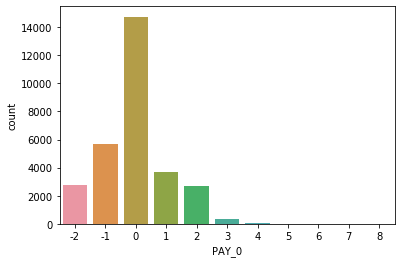

In [16]:
# Let us now check the payment statuses of each month
sns.countplot(x='PAY_0', data=df)

In [17]:
# Since our legend has no description for -2 and 0 in this. Let us now remove them and replace by -1 assuming that those customer paid their dues duly.
df.loc[df['PAY_0']==-2,"PAY_0"]=-1
df.loc[df['PAY_0']==0,"PAY_0"]=-1

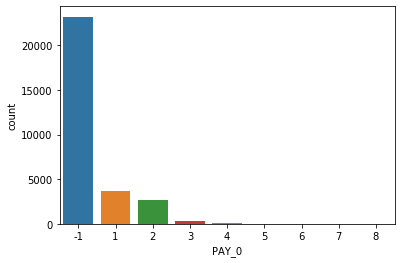

In [18]:
# Let us now check the dataset for the values
sns.countplot(x='PAY_0', data=df)

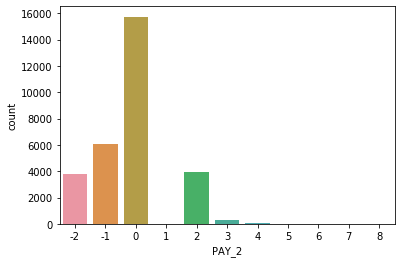

In [19]:
# Let us move to the next month
sns.countplot(x='PAY_2', data=df)

In [20]:
# Since our legend has no description for -2 and 0 in this. Let us now remove them and replace by -1 assuming that those customer paid their dues duly.
df.loc[df['PAY_2']==-2,"PAY_2"]=-1
df.loc[df['PAY_2']==0,"PAY_2"]=-1

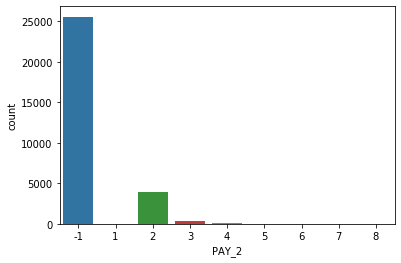

In [21]:
sns.countplot(x='PAY_2', data=df)

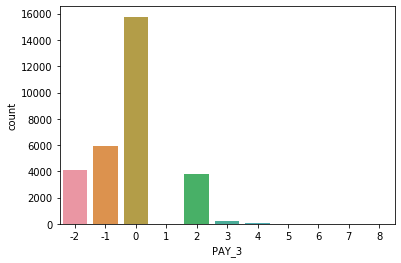

In [22]:
# Now let us do the same for the other such PAY_ columns
sns.countplot(x='PAY_3', data=df)

In [23]:
# Since our legend has no description for -2 and 0 in this. Let us now remove them and replace by -1 assuming that those customer paid their dues duly.
df.loc[df['PAY_3']==-2,"PAY_3"]=-1
df.loc[df['PAY_3']==0,"PAY_3"]=-1

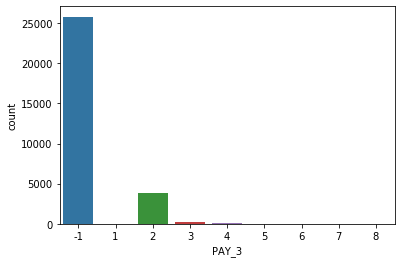

In [24]:
sns.countplot(x='PAY_3', data=df)

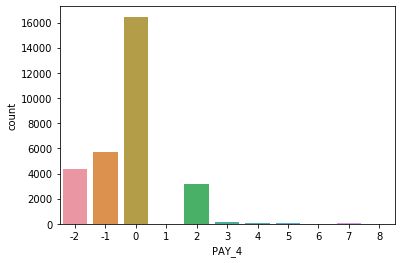

In [25]:
sns.countplot(x='PAY_4', data=df)

In [26]:
# Since our legend has no description for -2 and 0 in this. Let us now remove them and replace by -1 assuming that those customer paid their dues duly.
df.loc[df['PAY_4']==-2,"PAY_4"]=-1
df.loc[df['PAY_4']==0,"PAY_4"]=-1

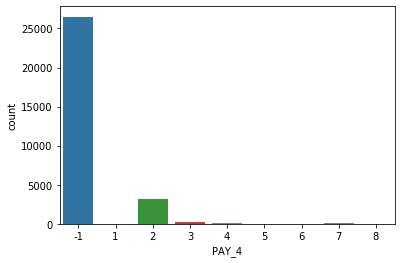

In [27]:
sns.countplot(x='PAY_4', data=df)

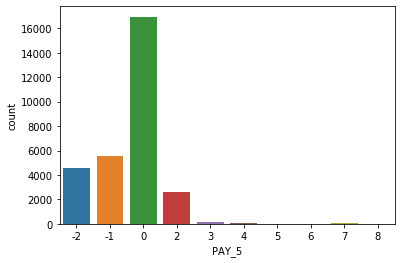

In [28]:
sns.countplot(x='PAY_5', data=df)

In [29]:
# Since our legend has no description for -2 and 0 in this. Let us now remove them and replace by -1 assuming that those customer paid their dues duly.
df.loc[df['PAY_5']==-2,"PAY_5"]=-1
df.loc[df['PAY_5']==0,"PAY_5"]=-1

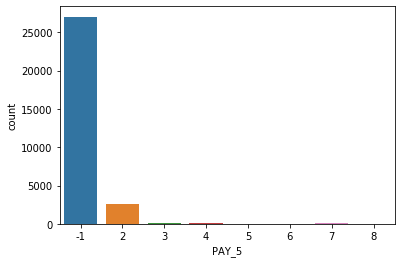

In [30]:
sns.countplot(x='PAY_5', data=df)

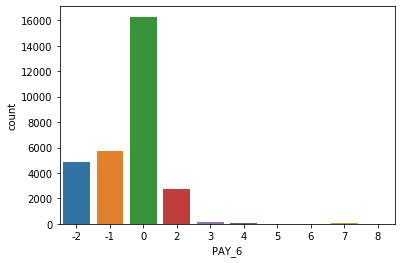

In [31]:
sns.countplot(x='PAY_6', data=df)

In [32]:
# Since our legend has no description for -2 and 0 in this. Let us now remove them and replace by -1 assuming that those customer paid their dues duly.
df.loc[df['PAY_6']==-2,"PAY_6"]=-1
df.loc[df['PAY_6']==0,"PAY_6"]=-1

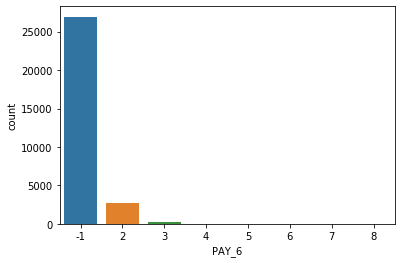

In [33]:
sns.countplot(x='PAY_6', data=df)

In [112]:
# Let us do a bit of EDA With deeper insights to be derived
default = df[df['default.payment.next.month']==1]

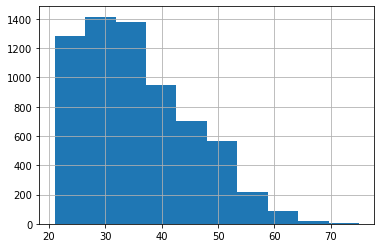

In [113]:
# histogram of age of defaulters
default['AGE'].hist()

This seems a bit similar to the whole data set

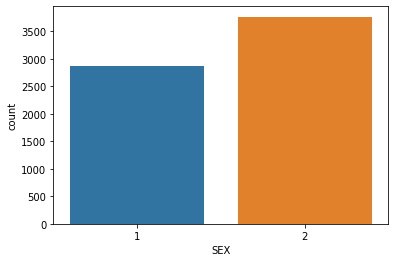

In [114]:
# Countplot of Age by defaulters
sns.countplot(x='SEX', data=default)

We can see that most defaulters are women. 

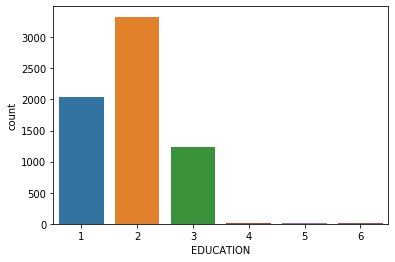

In [115]:
# Let us now see the defaulters as per education qualifications
sns.countplot(x='EDUCATION', data=default)

We can see graduate school people have less default than university people who have most default. Even high school people have less default. But that would be less informative as we would need to see the limit balance of the different categories.

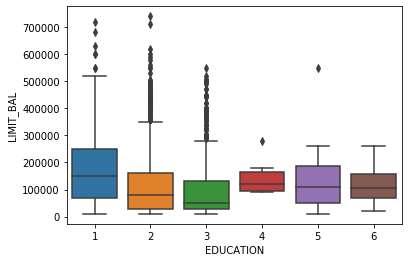

In [116]:
# Boxplot of different categories in terms of education
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=default)

We can see the limit enjoyed by the defaulters in the graduate category are highest and that of high school are lower and thus a lower chance of default. But all these categories in he dataset have tons of outliers in terms of education and thus education might now have the best relation with limit balance.

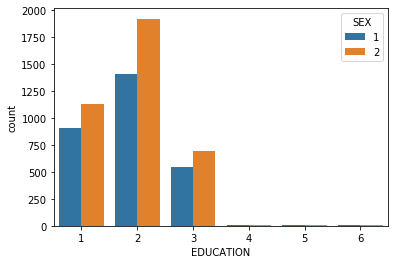

In [117]:
# Let us see the number of defaulters with respect to education and their respective sex.
sns.countplot(x='EDUCATION', hue='SEX', data=default)

Here we can see that in most defaulting categories in each educational level the defaulters are women.

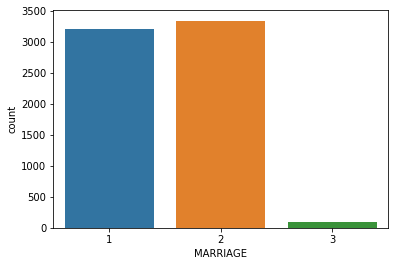

In [118]:
# Let us see the whether more defaulters are married or single
sns.countplot(x='MARRIAGE', data=default)

We can see that there is just a slight difference in the single and married categories in terms of being defaulters in this particular sample represented by the dataset.

# Removing the outliers now

In [34]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.73199307 1.13672015 0.81016074 ... 0.31413612 0.29338206 1.87637834]
 [1.7318776  0.3659805  0.81016074 ... 0.31413612 0.18087821 1.87637834]
 [1.73176213 0.59720239 0.81016074 ... 0.24868274 0.01212243 0.53294156]
 ...
 [1.73176213 1.05964618 1.23432296 ... 0.18322937 0.11900109 1.87637834]
 [1.7318776  0.67427636 1.23432296 ... 3.15253642 0.19190359 1.87637834]
 [1.73199307 0.90549825 1.23432296 ... 0.24868274 0.23713013 1.87637834]]


In [35]:
threshold = 3
print(np.where(z>3))

(array([    6,     6,     6, ..., 29997, 29998, 29998], dtype=int64), array([12, 13, 14, ...,  7, 18, 22], dtype=int64))


In [36]:
dfout = df[(z<3).all(axis=1)]

In [37]:
dfout

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,-1,-1,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,-1,-1,-1,-1,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,-1,-1,-1,-1,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,-1,-1,-1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,29993,10000.0,1,3,1,43,-1,-1,-1,-1,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29995,29996,220000.0,1,3,1,39,-1,-1,-1,-1,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0


In [38]:
dfout.to_pickle('dfpreprocessed.pkl')

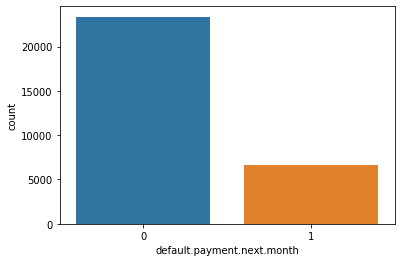

In [39]:
# Now let us check if the dataset is balanced or not
sns.countplot(x='default.payment.next.month', data=df)

In [40]:
# Since the dataset is heavily imbalanced we will have to balance it first in order to train a model on the dataset
from imblearn.combine import SMOTETomek

In [41]:
X = dfout.drop('default.payment.next.month', axis=1, inplace=False)
y = dfout['default.payment.next.month']

In [42]:
sampler = SMOTETomek(1)

C:\Users\mayan\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [43]:
Xout, yout = sampler.fit_resample(X,y)

In [44]:
yout.value_counts()

1    19753
0    19753
Name: default.payment.next.month, dtype: int64

In [45]:
# Now we have a balanced dataset with 19736 points each side. Let us now shuffle the dataset and create training, validation and testing sets.
Xout

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,-1,-1,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,-1,-1,-1,-1,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,-1,-1,-1,-1,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,-1,-1,-1,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39501,10602,62138.162836,1,3,1,41,-1,-1,2,-1,...,19809.767726,483.116992,637.492348,12897.093820,20545.402649,0.000000,0.000000,637.492348,12762.282654,2717.632821
39502,5754,50000.000000,1,1,1,26,1,1,1,1,...,47891.776461,50674.536795,49837.556041,49863.868989,3764.886687,166.904681,3656.938845,158.956839,3817.199635,151.008997
39503,11518,170631.108630,2,1,1,31,2,0,0,0,...,77789.848785,80900.512427,84066.313600,82612.124267,3656.799777,3187.377827,4649.747277,4811.644792,0.000000,3200.000000
39504,4359,50000.000000,1,2,1,27,-1,-1,-1,-1,...,792.761527,99.769881,218.383364,31.526366,2496.597787,805.418098,307.107511,230.119456,46.023891,207.107511


In [46]:
# Now let us create dummies on the relevant columns i.e. SEX, MARRIAGE, EDUCATION.
sex = pd.get_dummies(Xout['SEX'], prefix='SEX', drop_first=True)
edu = pd.get_dummies(Xout['EDUCATION'], prefix='EDUCATION', drop_first=True)
marriage = pd.get_dummies(Xout['MARRIAGE'], prefix='MARRIAGE', drop_first=True)

In [47]:
Xout = pd.concat([Xout, sex, edu, marriage], axis=1)
Xout.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1, inplace=True)


In [48]:
Xout.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [49]:
ordercol = ['ID', 'LIMIT_BAL','SEX_2','EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4','MARRIAGE_2',
       'MARRIAGE_3', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'   ]
Xout = Xout[ordercol]

In [50]:
# Now let us scale the given data before proceeding to ML Training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscaled = scaler.fit_transform(Xout)

In [51]:
Xscaled= pd.DataFrame(Xscaled, columns=Xout.columns)
Xscaled

,ID,LIMIT_BAL,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,AGE,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.770685,-1.073396,0.967176,-0.796898,1.024343,-0.370260,-0.052113,-0.893546,-0.09206,-1.300507,...,-0.769911,-0.770381,-0.747324,-0.731520,-0.646129,-0.465573,-0.561861,-0.545576,-0.565809,-0.522514
1,-1.770566,-0.200239,0.967176,-0.796898,1.024343,-0.370260,-0.052113,1.119136,-0.09206,-1.066588,...,-0.727307,-0.695572,-0.664682,-0.652460,-0.646129,-0.411812,-0.372823,-0.343751,-0.565809,-0.131366
2,-1.770448,-0.462186,0.967176,-0.796898,1.024343,-0.370260,-0.052113,1.119136,-0.09206,-0.130913,...,-0.494794,-0.442725,-0.389778,-0.354546,-0.352832,-0.325380,-0.372823,-0.343751,-0.352887,0.455356
3,-1.770329,-0.811449,0.967176,-0.796898,1.024343,-0.370260,-0.052113,-0.893546,-0.09206,0.219966,...,0.269036,-0.123024,-0.054644,-0.015175,-0.259703,-0.235664,-0.335015,-0.323569,-0.338195,-0.326940
4,-1.770211,-0.811449,-1.033938,-0.796898,1.024343,-0.370260,-0.052113,-0.893546,-0.09206,2.559155,...,-0.018608,-0.291620,-0.289364,-0.267703,-0.259703,5.756140,1.328523,1.270846,-0.419105,-0.389720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39501,-0.514334,-0.705464,-1.033938,-0.796898,-0.976235,2.700806,-0.052113,-0.893546,-0.09206,0.687804,...,-0.361173,-0.759336,-0.732075,-0.418840,3.323505,-0.584676,-0.561861,-0.416914,2.151570,0.008984
39502,-1.088882,-0.811449,-1.033938,1.254865,-0.976235,-0.370260,-0.052113,-0.893546,-0.09206,-1.066588,...,0.239125,0.388216,0.444757,0.477392,0.081295,-0.555824,0.129441,-0.513495,0.246959,-0.492981
39503,-0.405776,0.241851,0.967176,1.254865,-0.976235,-0.370260,-0.052113,-0.893546,-0.09206,-0.481791,...,0.878245,1.079288,1.263485,1.271349,0.060412,-0.033694,0.317120,0.425533,-0.565809,0.103323
39504,-1.254207,-0.811449,-1.033938,-0.796898,1.024343,-0.370260,-0.052113,-0.893546,-0.09206,-0.949629,...,-0.767693,-0.768100,-0.742100,-0.730756,-0.163754,-0.445448,-0.503806,-0.499132,-0.556010,-0.482010


In [52]:
# Importing train test split
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, yout, train_size=0.9, random_state=42)

In [54]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, train_size=(8/9), random_state=42)

In [55]:
# Since we don't need ID Column in our classifier. Let us drop it from all our X columns.
X_train2.drop('ID', axis=1, inplace=True)
X_valid.drop('ID', axis=1, inplace=True)
X_test.drop('ID', axis=1, inplace=True)

C:\Users\mayan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Let us start Training the model on different classifier starting from basic to deep neural nets

# Logistic Regression

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [57]:
reg = LogisticRegression()
reg.fit(X_train2, y_train2)
model1 = reg.fit(X_train2, y_train2)


In [58]:
# Now let us evaluate the model
reg.score(X_train2, y_train2)

0.7594608277433237

In [59]:
# It has a training accuracy of 76.14 %. Let us check the validation and testing accuracy
reg.score(X_valid, y_valid)

0.7643634522905594

In [60]:
reg.score(X_test, y_test)

0.7636041508478866

The accuracy of the model seems consistent but it seems low

# K Neighbors Classifier

In [61]:
# Now let us try K-Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(5)
model2 = knn.fit(X_train2, y_train2)

In [63]:
model2.score(X_train2, y_train2)

0.8611568155929629

In [64]:
model2.score(X_valid, y_valid)

0.7962541128828144

In [65]:
model2.score(X_test, y_test)

0.7891672994178689

This model has an accuracy of 86% in training and 79-80% in testing and validation, which thought better than logistic regression is still now as good as it could be.

# Random Forest Classifier

In [66]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(100)

In [68]:
rfc.fit(X_train2, y_train2)

RandomForestClassifier()

In [69]:
rfc.score(X_train2, y_train2)

0.9995253765346158

In [70]:
rfc.score(X_valid, y_valid)

0.8607947355099975

In [71]:
rfc.score(X_test, y_test)

0.8633257403189066

The model using Random Forests heavily overfits with 99% train accuracy and 86-87% Validation and Testing Accuracy. So we would need to still look for other options.

# Gaussian Naive Bayes Classifier

In [72]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

In [73]:
nb = GaussianNB()

In [74]:
nb.fit(X_train2, y_train2)

GaussianNB()

In [75]:
nb.score(X_train2, y_train2)

0.6537463612200988

The training accuracy itself of the gaussian naive bayes classifier is very poor.

# XGBoost Classifier

In [76]:
from xgboost import XGBClassifier, XGBRFClassifier

In [77]:
xgb = XGBClassifier()

In [78]:
xgb.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
xgb.score(X_train2, y_train2)

0.9100746740918871

In [80]:
xgb.score(X_valid, y_valid)

0.8463680080992154

In [81]:
xgb.score(X_test, y_test)

0.8483928119463428

The scores are quite good for a non-Neural Network Classifier. Let us check out XGBRFC now

# XGBRFClassifier

In [82]:
xgbrfc = XGBRFClassifier()

In [83]:
xgbrfc.fit(X_train2, y_train2)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [84]:
xgbrfc.score(X_train2, y_train2)

0.8091697253512213

This has a lower training accuracy itself so there wouldn't be much point checking the validation and testing accuracies.

# Gradient Boosting Classifier

In [85]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbm = GradientBoostingClassifier()

In [87]:
gbm.fit(X_train2, y_train2)

GradientBoostingClassifier()

In [88]:
gbm.score(X_train2, y_train2)

0.8268573598278699

Here too the training accuracy was not as great. So till now the XGBClassifier seems most consistent and best model.

# Basic Deep Neural Network for Classification

In [89]:
# Now let us try out neural networks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
model = Sequential()

In [91]:
input_size = 27

model.add(Dense(input_size, activation='relu'))
model.add(Dense(27, activation='relu'))

model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [92]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
batch_size = 10
max_epochs = 1000
early =EarlyStopping(patience=50)

In [94]:
model.fit(X_train2, y_train2, batch_size=batch_size, epochs=max_epochs, callbacks=[early], validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3161/3161 - 7s - loss: 0.4950 - accuracy: 0.7680 - val_loss: 0.4572 - val_accuracy: 0.7907
Epoch 2/1000
3161/3161 - 6s - loss: 0.4414 - accuracy: 0.7942 - val_loss: 0.4257 - val_accuracy: 0.7975
Epoch 3/1000
3161/3161 - 6s - loss: 0.4206 - accuracy: 0.8034 - val_loss: 0.4223 - val_accuracy: 0.7998
Epoch 4/1000
3161/3161 - 6s - loss: 0.4096 - accuracy: 0.8064 - val_loss: 0.4153 - val_accuracy: 0.8079
Epoch 5/1000
3161/3161 - 6s - loss: 0.4045 - accuracy: 0.8119 - val_loss: 0.4138 - val_accur

Epoch 73/1000
3161/3161 - 6s - loss: 0.3454 - accuracy: 0.8387 - val_loss: 0.3915 - val_accuracy: 0.8241
Epoch 74/1000
3161/3161 - 6s - loss: 0.3449 - accuracy: 0.8381 - val_loss: 0.4006 - val_accuracy: 0.8238
Epoch 75/1000
3161/3161 - 6s - loss: 0.3449 - accuracy: 0.8372 - val_loss: 0.3965 - val_accuracy: 0.8251
Epoch 76/1000
3161/3161 - 6s - loss: 0.3449 - accuracy: 0.8390 - val_loss: 0.3949 - val_accuracy: 0.8284
Epoch 77/1000
3161/3161 - 6s - loss: 0.3441 - accuracy: 0.8375 - val_loss: 0.3993 - val_accuracy: 0.8203
Epoch 78/1000
3161/3161 - 6s - loss: 0.3447 - accuracy: 0.8388 - val_loss: 0.4020 - val_accuracy: 0.8180
Epoch 79/1000
3161/3161 - 6s - loss: 0.3435 - accuracy: 0.8377 - val_loss: 0.4133 - val_accuracy: 0.8223
Epoch 80/1000
3161/3161 - 6s - loss: 0.3433 - accuracy: 0.8393 - val_loss: 0.3968 - val_accuracy: 0.8261
Epoch 81/1000
3161/3161 - 6s - loss: 0.3444 - accuracy: 0.8374 - val_loss: 0.4225 - val_accuracy: 0.8170
Epoch 82/1000
3161/3161 - 6s - loss: 0.3433 - accuracy:

In [95]:
predmodel = model.predict_classes(X_train2)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(classification_report(y_train2, predmodel))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15803
           1       0.89      0.78      0.83     15801

    accuracy                           0.84     31604
   macro avg       0.85      0.84      0.84     31604
weighted avg       0.85      0.84      0.84     31604



In [98]:
predvalid = model.predict_classes(X_valid)

In [99]:
print(classification_report(y_valid, predvalid))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1936
           1       0.88      0.76      0.81      2015

    accuracy                           0.82      3951
   macro avg       0.83      0.83      0.82      3951
weighted avg       0.83      0.82      0.82      3951



In [100]:
predtest = model.predict_classes(X_test)

In [119]:
print(classification_report(y_test, predtest))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2014
           1       0.86      0.76      0.80      1937

    accuracy                           0.82      3951
   macro avg       0.82      0.82      0.82      3951
weighted avg       0.82      0.82      0.82      3951



so the xgboost model seems best till now in terms of accuracy. Lets check its classification report and confusion matrix as well.

In [102]:
predtrainxgb = xgb.predict(X_train2)
predvalxgb = xgb.predict(X_valid)
predtestxgb = xgb.predict(X_test)


In [103]:
print(classification_report(y_test, predtestxgb))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2014
           1       0.88      0.80      0.84      1937

    accuracy                           0.85      3951
   macro avg       0.85      0.85      0.85      3951
weighted avg       0.85      0.85      0.85      3951



In [104]:
print(classification_report(y_valid, predvalxgb))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1936
           1       0.89      0.80      0.84      2015

    accuracy                           0.85      3951
   macro avg       0.85      0.85      0.85      3951
weighted avg       0.85      0.85      0.85      3951



In [105]:
print(classification_report(y_train2, predtrainxgb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     15803
           1       0.95      0.87      0.91     15801

    accuracy                           0.91     31604
   macro avg       0.91      0.91      0.91     31604
weighted avg       0.91      0.91      0.91     31604



In [106]:
# checking rfc
predtrainrfc = rfc.predict(X_train2)
predvalrfc = rfc.predict(X_valid)
predtestrfc = rfc.predict(X_test)

In [107]:
print(classification_report(y_train2, predtrainrfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15803
           1       1.00      1.00      1.00     15801

    accuracy                           1.00     31604
   macro avg       1.00      1.00      1.00     31604
weighted avg       1.00      1.00      1.00     31604



In [108]:
# 100 % train accuracy seems rather wrong. but let's check validation and test
print(classification_report(y_valid, predvalrfc))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1936
           1       0.91      0.81      0.86      2015

    accuracy                           0.86      3951
   macro avg       0.86      0.86      0.86      3951
weighted avg       0.87      0.86      0.86      3951



In [109]:
print(classification_report(y_test, predtestrfc))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2014
           1       0.89      0.82      0.85      1937

    accuracy                           0.86      3951
   macro avg       0.87      0.86      0.86      3951
weighted avg       0.87      0.86      0.86      3951



Though Random Forest fits the training data perfectly and provides an f1-score and accuracy both similar to xgboost classifier, but the XGBClassifier is more consistent with less overfitting being observed and hence can be considered here as the best available model in this scenario.